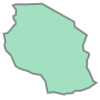

In [9]:
import topojson as tp
from shapely import geometry
import topojson as tp
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
data = world.query('continent == "Africa"')
data.geometry.to_list()[0]

In [5]:
l = tp.Topology(data=data, topology=False).toposimplify(4).to_alt().properties(title='WITHOUT Topology')
r = tp.Topology(data, topology=True).toposimplify(4).to_alt().properties(title='WITH Topology')
l | r

alt.HConcatChart(...)

In [26]:
# compute the scaling factor (kx) given the quantize factor (qf)
qf = 4e3
kx = (x.max() - x.min()) / (qf - 1)
print(f'kx: {kx}')

kx: 0.5001250312578145


In [27]:
# shift and apply the scaling factor to map the x-numbers on the integer range
xnorm = np.round((x - x.min()) / kx).astype(int)
print(f'x-normalized:\n{xnorm}')

x-normalized:
[[   0 1998 1998    0    0]
 [2001 3999 3999 2001 2001]]


In [28]:
# denormalize happens as follow
print(f'x-denormalized:\n{xnorm * kx + x.min()}')

x-denormalized:
[[   0.          999.24981245  999.24981245    0.            0.        ]
 [1000.75018755 2000.         2000.         1000.75018755 1000.75018755]]


In [29]:
# delta encoding of normalized x-numbers
x_quant = np.insert(np.diff(xnorm), 0, xnorm[:,0], axis=1)
print(f'x-quantized (normalized-delta-encoded):\n{x_quant}')

x-quantized (normalized-delta-encoded):
[[    0  1998     0 -1998     0]
 [ 2001  1998     0 -1998     0]]


In [30]:
# dequantization of quantized x-numbers
x_dequant = x_quant.cumsum(axis=1) * kx + x.min()
print(f'x-dequantized:\n{x_dequant}')

x-dequantized:
[[   0.          999.24981245  999.24981245    0.            0.        ]
 [1000.75018755 2000.         2000.         1000.75018755 1000.75018755]]


In [35]:
topo = tp.Topology(data, prequantize=qf)
topo.to_alt()

alt.Chart(...)

In [39]:
# test on real data
import pickle
from geojson import Feature, Polygon, FeatureCollection
topo_data = pickle.load(open('topo_data', 'rb'))
tolerance = 2
fc = FeatureCollection(topo_data)
topo = tp.Topology(fc, prequantize=4e3, topology=True, shared_coords=False)
topo_s = topo.toposimplify(
    epsilon=tolerance, 
    simplify_algorithm='vw', 
    simplify_with='simplification', 
    )
topo_s.to_svg()

interactive(children=(FloatSlider(value=0.01, description='Toposimplify Factor', max=10.0, step=0.01, style=Sl…

<function topojson.utils.toposimpquant(epsilon, quant, algo, topo)>